## Loading The Data By Using Pandas

In [6]:
import pandas as pd

In [7]:
file = pd.read_csv("/Eclectric Vechical.csv")
df = pd.DataFrame(file)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


- **This code is helping to check How many rows and columns**

In [8]:
df.shape

(112634, 17)

- **This code is helping to check data types like (categorical = "object", numerical(continuous) = "int", However one more column its "float")**

In [9]:
df.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


- **Checking Null or Missing values**

In [10]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [11]:
import warnings
warnings.filterwarnings("ignore")

- **filling missing values**

In [12]:
df["Model"].fillna(df["Model"].mode()[0],inplace=True)

In [13]:
df["Legislative District"].fillna(df["Legislative District"].median(),inplace=True)

In [14]:
df["Vehicle Location"].fillna(df["Vehicle Location"].mode()[0],inplace=True)

In [15]:
df["Electric Utility"].fillna(df["Electric Utility"].mode()[0],inplace=True)

In [16]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


- **Univarient Analysis On Numeric Columns**

In [17]:
numeric = df.select_dtypes(include="number")

In [18]:
def univarient_numeric(numeric_data):
    for col in numeric_data:
        print("*"*10, col ,"*"*10)
        stats = numeric_data[col].agg(["min","max","mean","median","std","skew","kurt"])
        print(stats)

univarient_numeric(numeric)

********** Postal Code **********
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
skew        -27.955285
kurt        820.874840
Name: Postal Code, dtype: float64
********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
skew        -0.817579
kurt        -0.001160
Name: Model Year, dtype: float64
********** Electric Range **********
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
skew        0.817103
kurt       -0.876312
Name: Electric Range, dtype: float64
********** Base MSRP **********
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
skew          10.100497
kurt         371.695682
Name: Base MSRP, dtype: float64
********** Legislative District **********
min        1.000000
max       49.000000
mean      29.81

In [19]:
import matplotlib.pyplot as plt

## Univarient Analysis on Numeric Columns How data Is disturbuted by using Box Plot

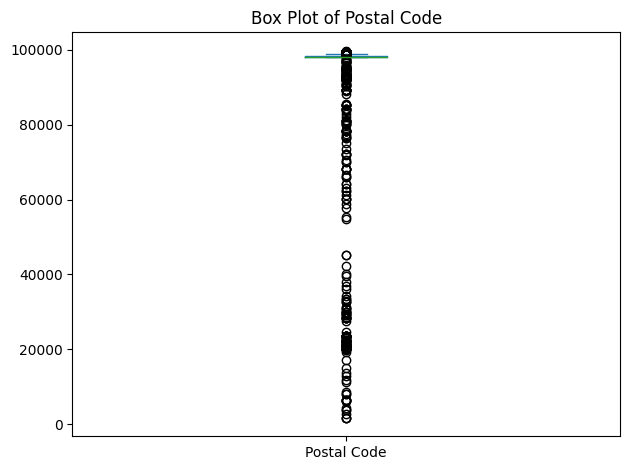

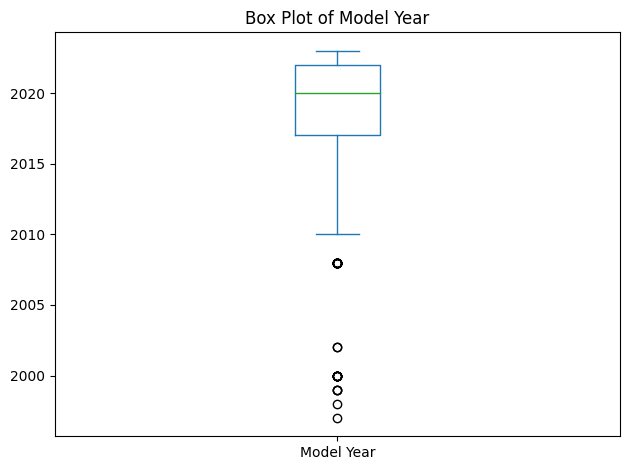

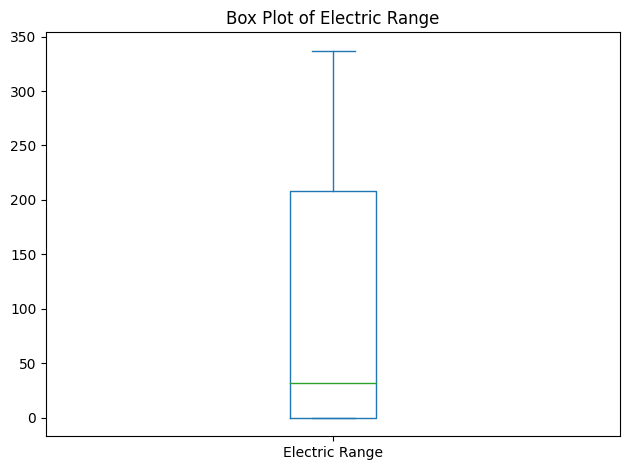

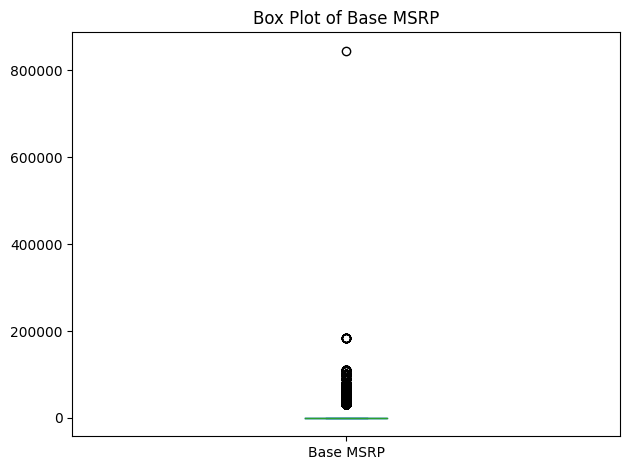

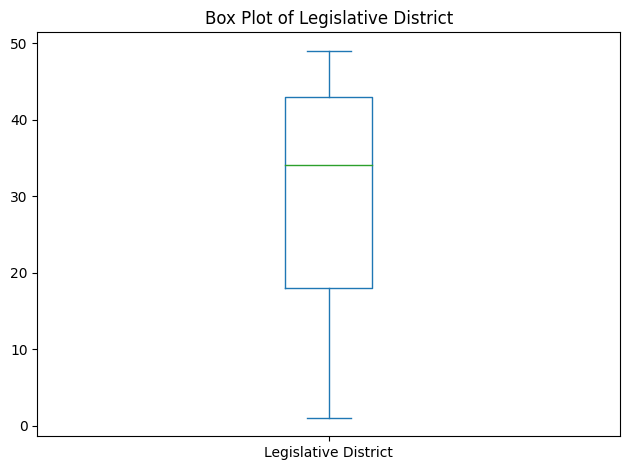

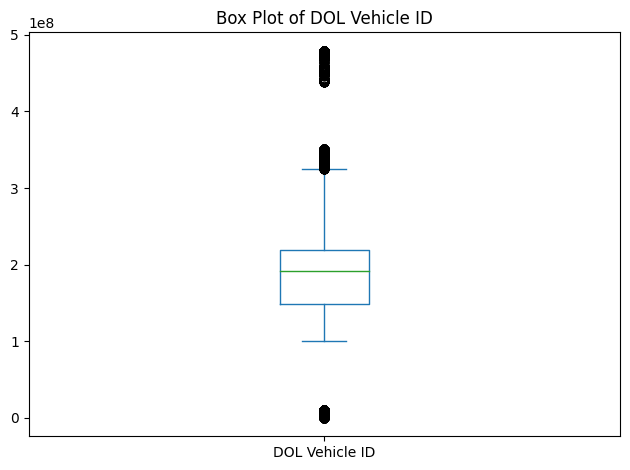

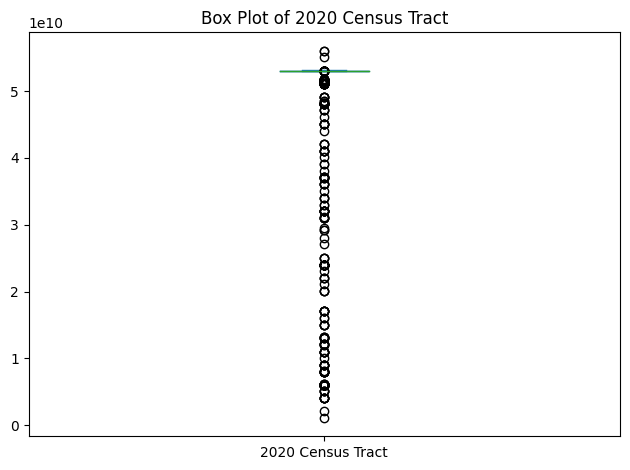

In [20]:
def visualization(numeric_data):
    for col in numeric_data.columns:
        numeric_data[col].plot(kind="box")
        plt.title(f"Box Plot of {col}")
        plt.tight_layout()
        plt.show()


visualization(numeric)

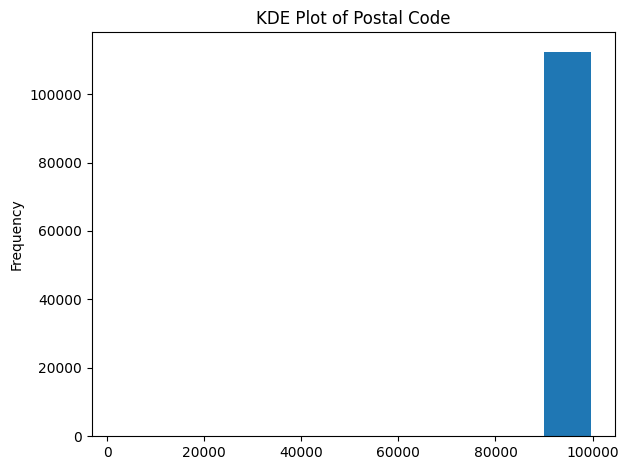

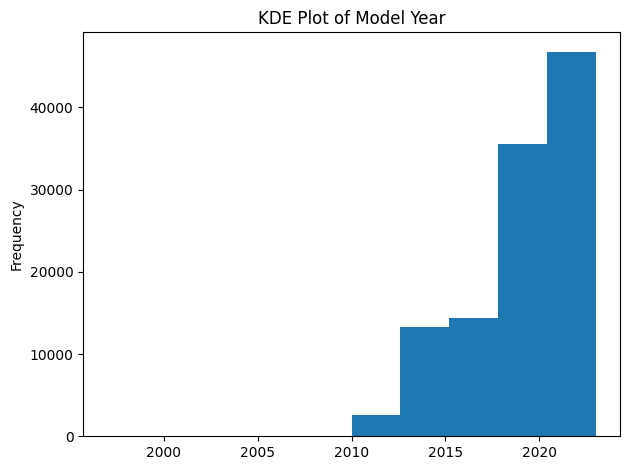

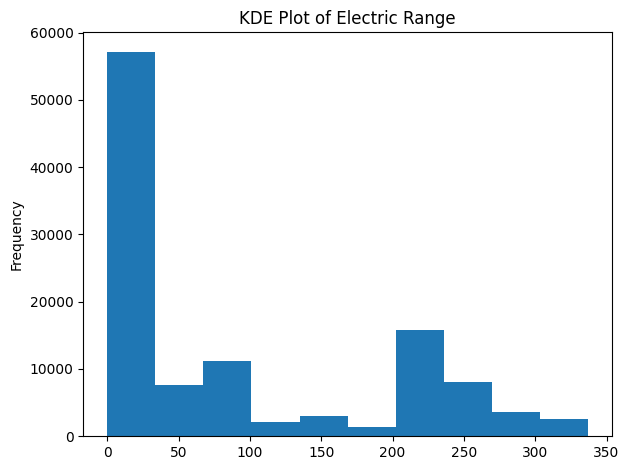

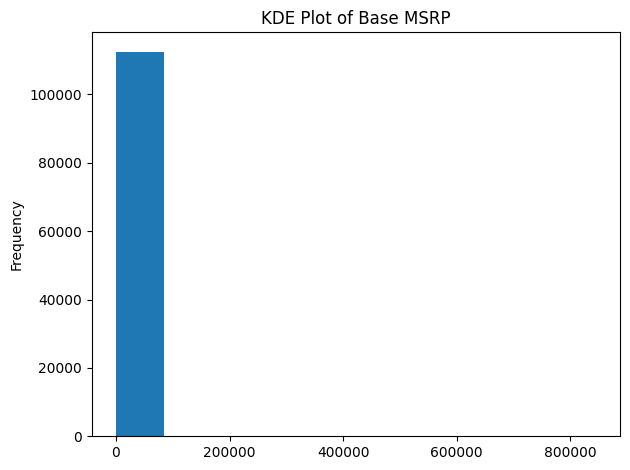

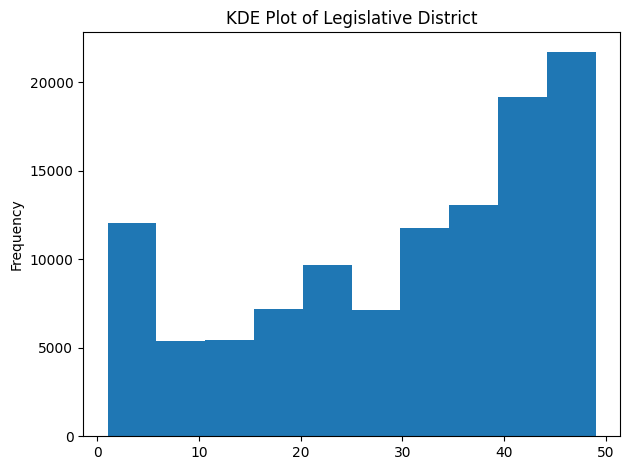

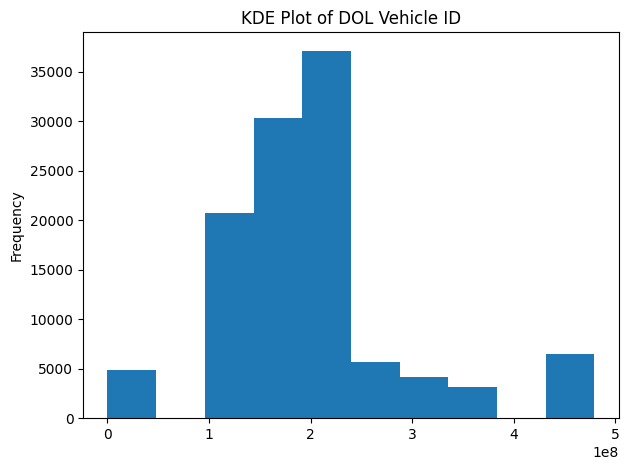

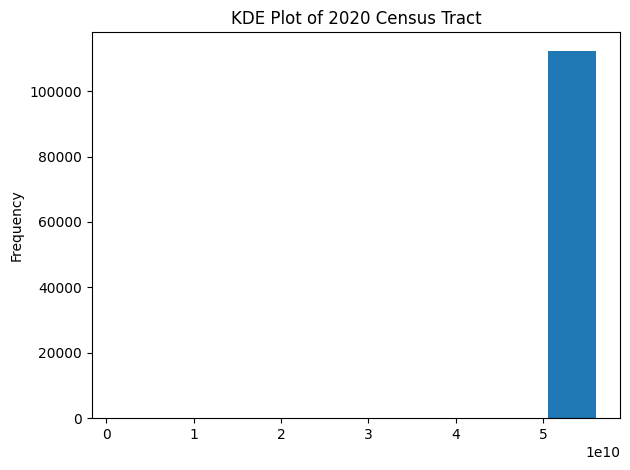

In [21]:
def visualization(numeric_data):
    for col in numeric_data.columns:
        numeric_data[col].plot(kind="hist")
        plt.title(f"KDE Plot of {col}")
        plt.tight_layout()
        plt.show()


visualization(numeric)

- **Performaing Univarte analysis on Categorical data**

In [22]:
categorical = df.select_dtypes(include="object")

## **Unique**

- **This tells us unique values are are present the data**

## **Nunique**

- **This tells us how many uniques values are present in the data**

In [23]:
def univarient_cat(cat_data):
    for i in cat_data:
        print("*"*10, i ,"*"*10)
        print("Unique values:",cat_data[i].unique())
        print("Nunique values:",cat_data[i].nunique())
        print("--------------------------------------------------------")

univarient_cat(categorical)

********** VIN (1-10) **********
Unique values: ['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... 'KMHE14L25K' 'WA1LAAGE5M'
 'YV4ED3GM0P']
Nunique values: 7548
--------------------------------------------------------
********** County **********
Unique values: ['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo' 'Pend Oreille' 'Bexar'
 'Garfield' 'Pennington' 'Honolulu' 'Anne Arundel'

## The county with the highest population is King, followed by Snohomish and Pierce. The remaining counties have significantly smaller populations, with many having only 1 individual.

In [24]:
df["County"].value_counts()

,count
County,
King,59000
Snohomish,12434
Pierce,8535
Clark,6689
Thurston,4126
...,...
Pinal,1
Elmore,1
Portsmouth,1


In [25]:
df["City"].value_counts()

,count
City,
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598
...,...
Hartline,1
Gaithersburg,1
El Paso,1


In [26]:
df["State"].value_counts().head(10)

,count
State,
WA,112348
CA,76
VA,36
MD,26
TX,14
CO,9
NV,8
GA,7
NC,7


In [27]:
df["Model"].value_counts()

,count
Model,
MODEL 3,23155
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910
...,...
745LE,2
S-10 PICKUP,1
SOLTERRA,1


## **Visulization_categorical**

## the popularity of different electric car models. The most popular model is the Model 3, followed by the Model Y. The least popular models are the i3 and Niro. The overall popularity of electric cars seems to be increasing, as evidenced by the relatively high sales of the Model 3 and Model Y.

<Axes: ylabel='Model'>

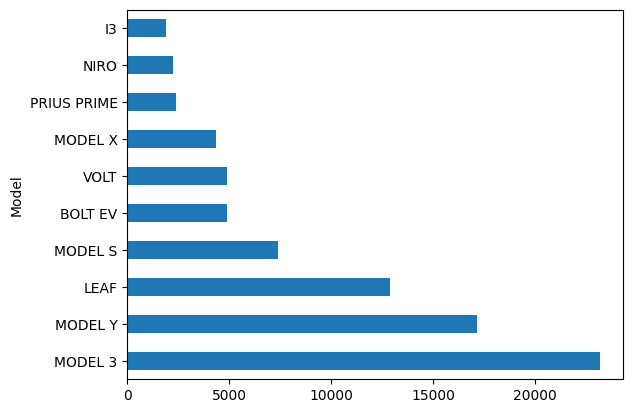

In [28]:
df["Model"].value_counts().head(10).plot(kind = "barh")

## the distribution of electric vehicle types. The majority of electric vehicles are Battery Electric Vehicles (BEV), while a smaller portion are Plug-in Hybrid Electric Vehicles (PHEV). This suggests that BEVs are currently more popular among consumers, potentially due to factors such as longer range and lower operating costs.

<Axes: ylabel='Electric Vehicle Type'>

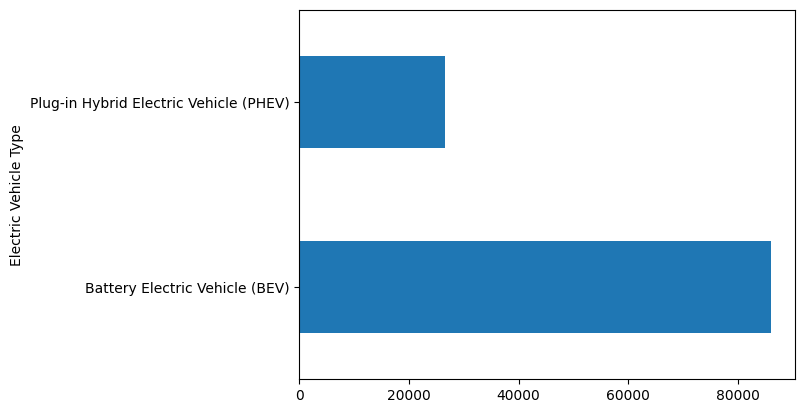

In [29]:
df["Electric Vehicle Type"].value_counts().plot(kind = "barh")

## the eligibility of different electric vehicles for Clean Alternative Fuel Vehicle (CAFV) incentives. The majority of vehicles are eligible, while some are ineligible due to low battery range. A significant number of vehicles have not been researched for battery range, and their eligibility is therefore unknown. This suggests that there is a need for more information on electric vehicle battery ranges to determine their eligibility for CAFV incentives.

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

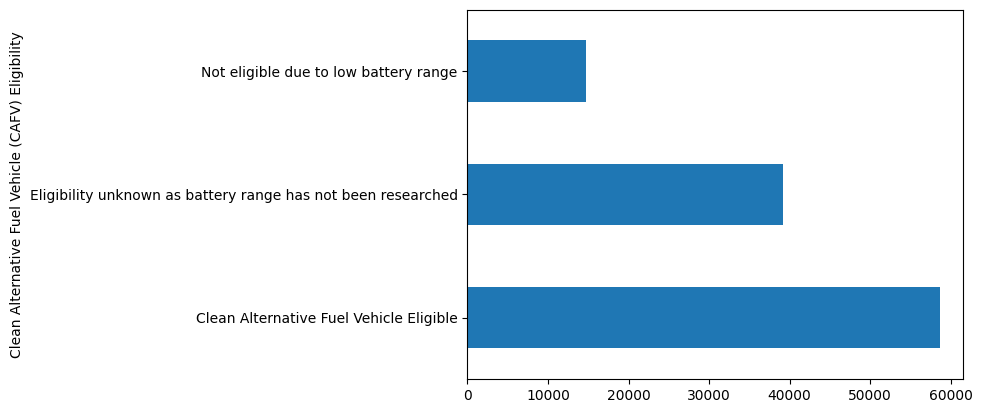

In [30]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().plot(kind = "barh")

## Bi Varient Analysis

### Numeric Vs Numeric

In [31]:
numeric.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,34.0,198968248,12087972100
1,89029,2013,38,0,34.0,5204412,32003005702
2,98901,2011,73,0,15.0,218972519,53077001602
3,98237,2017,238,0,39.0,186750406,53057951101
4,98201,2019,26,0,38.0,2006714,53061041500


In [32]:
correlation = df['Electric Range'].corr(df['Model Year'])

print("Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':", correlation)

Pearson Correlation Coefficient between 'Electric Range' and 'Model Year': -0.2884334324652219


In [33]:
correlation = df['Electric Range'].corr(df['Base MSRP'])

print("Pearson Correlation Coefficient between 'Electric Range' and 'Base MSRP':", correlation)

Pearson Correlation Coefficient between 'Electric Range' and 'Base MSRP': 0.0850250369824561


In [34]:
import seaborn as sns

<Axes: xlabel='Electric Range', ylabel='Model Year'>

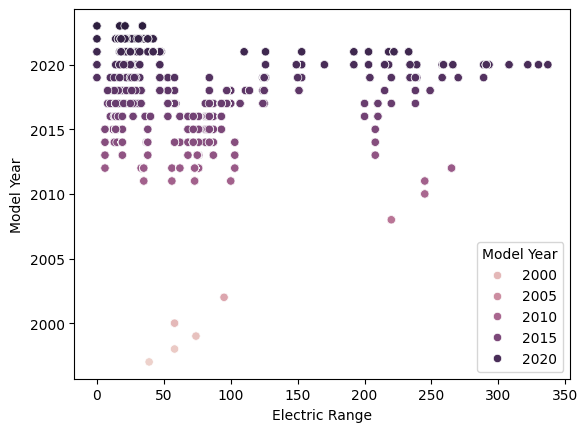

In [35]:
sns.scatterplot(df,x= df["Electric Range"],y=df["Model Year"],hue=df["Model Year"])

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

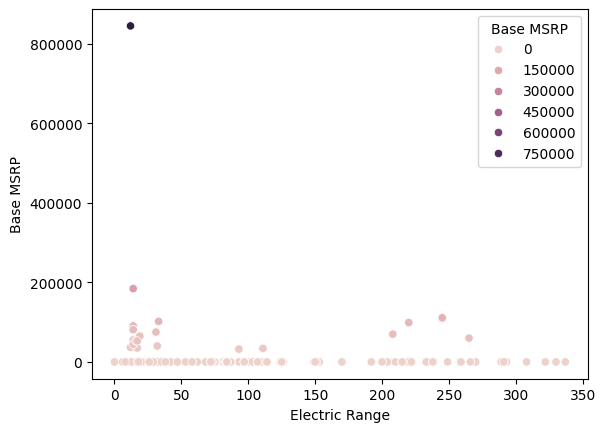

In [36]:
sns.scatterplot(df,x=df["Electric Range"],y = df["Base MSRP"],hue = df["Base MSRP"])

## Categorical Vs Numerical

In [37]:
df.groupby(by = "Make")["Model Year"].value_counts()

Make   Model Year
AUDI   2022          585
       2021          544
       2019          392
       2020          224
       2016          214
                    ... 
VOLVO  2019          190
       2020          162
       2017          115
       2016          112
       2023           21
Name: count, Length: 209, dtype: int64

In [38]:
df.groupby(by = "Make")["Electric Range"].mean().head(10)

,Electric Range
Make,
AUDI,62.876930
AZURE DYNAMICS,56.000000
BENTLEY,18.666667
BMW,46.657479
CADILLAC,35.537037
CHEVROLET,109.766549
CHRYSLER,32.361204
FIAT,85.624088
FISKER,33.000000


In [39]:
df.groupby(by = ["Make","County"])["Model Year"].value_counts()

Make   County   Model Year
AUDI   Adams    2017           1
       Benton   2022          16
                2021           7
                2017           2
                2019           1
                              ..
VOLVO  Whitman  2022           1
       Yakima   2022           4
                2021           3
                2018           2
                2016           1
Name: count, Length: 4024, dtype: int64

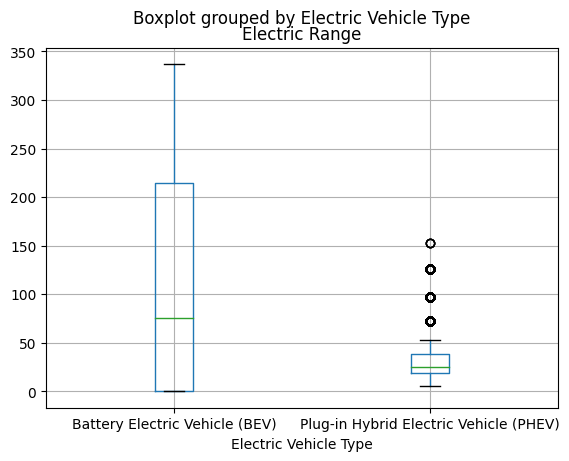

In [40]:
df.boxplot(column="Electric Range", by = "Electric Vehicle Type")#figsize = (8,6))
plt.show()

## Categorical Vs Categorical

In [41]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,34.0,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [42]:
cross_tab = pd.crosstab(df["Make"],df["County"]).count()

In [43]:
cross_tab

,0
County,
Adams,34
Alameda,34
Alexandria,34
Allegheny,34
Anne Arundel,34
...,...
Whatcom,34
Whitman,34
Wichita,34


In [44]:
grouped_df = df.groupby(by=["Make", "Model"])


pd.crosstab(index=df["County"], columns=[df["Make"], df["Model"]])

Make         AUDI                                                       \
Model          A3 A7 A8 E E-TRON E-TRON GT E-TRON SPORTBACK Q4 Q5 Q5 E   
County                                                                   
Adams           1  0    0      0         0                0  0  0    0   
Alameda         0  0    0      0         0                0  0  0    0   
Alexandria      0  0    0      0         0                0  0  0    0   
Allegheny       0  0    0      0         0                0  0  0    0   
Anne Arundel    0  0    0      0         0                0  0  0    0   
...           ... ..  ...    ...       ...              ... .. ..  ...   
Whatcom        21  0    0     21         2                6  3  5   11   
Whitman         1  0    0      0         0                0  0  0    1   
Wichita         0  0    0      0         0                0  0  0    0   
Williams        0  0    0      0         0                0  0  0    0   
Yakima          1  0    0      2         0                1  1  2    4   

Make                       ... VOLKSWAGEN      VOLVO                           \
Model        RS E-TRON GT  ...     E-GOLF ID.4   C40 MODEL 3 S60 S90 V60 XC40   
County                     ...                                                  
Adams                   0  ...          0    0     0       0   0   0   0    0   
Alameda                 0  ...          0    0     0       0   0   0   0    0   
Alexandria              0  ...          0    1     0       0   0   0   0    0   
Allegheny               0  ...          0    0     0       0   0   0   0    0   
Anne Arundel            0  ...          0    0     0       0   0   0   0    0   
...                   ...  ...        ...  ...   ...     ...  ..  ..  ..  ...   
Whatcom                 0  ...         32   56     1       0   1   0   1   13   
Whitman                 0  ...          1    3     0       0   0   0   0    0   
Wichita                 0  ...          0    0     0       0   0   0   0    0   
Williams                0  ...          0    0     0       0   0   0   0    0   
Yakima                  0  ...          3    9     2       0   0   0   0    1   

Make                    
Model        XC60 XC90  
County                  
Adams           0    0  
Alameda         0    0  
Alexandria      0    0  
Allegheny       0    0  
Anne Arundel    0    0  
...           ...  ...  
Whatcom        14   16  
Whitman         1    0  
Wichita         0    0  
Williams        0    0  
Yakima          3    4  

[165 rows x 115 columns]

<Axes: xlabel='Make'>

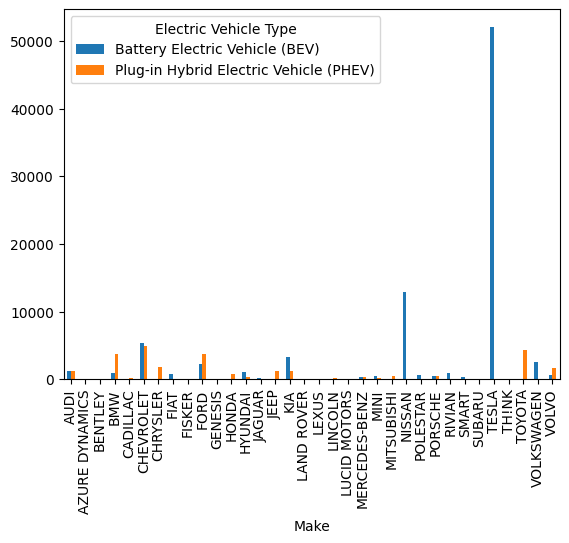

In [45]:
pd.crosstab(index=df["Make"],columns=df["Electric Vehicle Type"]).plot(kind = "bar")

## Create a Choropleth using plotly.express to display the number of EV vehicles based on location.



## ploty installation

In [46]:
pip install plotly

In [47]:
import plotly.express as px

In [48]:
ev_count_per_state = df.groupby('State').size().reset_index(name='ev_count')

In [49]:
ev_count_per_state.head(10)

,State,ev_count
0,AK,1
1,AL,1
2,AR,4
3,AZ,6
4,CA,76
5,CO,9
6,CT,6
7,DC,6
8,DE,1
9,FL,6


In [50]:
fig = px.choropleth(ev_count_per_state,
                    locations='State',  # Column representing state locations
                    locationmode="USA-states",  # Use USA state-level mapping
                    color='ev_count',  # Column representing the count of EVs
                    scope="usa",  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale
                    title='Number of EV Vehicles by State')

fig.show()

### Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [52]:
pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.4 MB/s eta 0:00:00


In [53]:
import bar_chart_race as bcr

In [54]:
make_counts_per_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [55]:
pivot_df = make_counts_per_year.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

In [56]:
bcr.bar_chart_race(df=pivot_df,
                   title='Electric Vehicles Make Count Over Time',

                    n_bars=10,

                   period_length=500,
)